In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", None)

In [ ]:
flights = sm.datasets.get_rdataset('flights', 'nycflights13').data

# Q1

In [9]:
# Q1
# ai
result1 = flights.query('dep_delay >= 120')

In [10]:
#aii
result2 = flights.query("dest in ['IAH', 'HOU']")

In [11]:
#aiii
result3 = flights.query("carrier in ['AA', 'DL', 'UA']")

In [12]:
#aiv
result4 = flights.query("month in [12, 1, 2]")

In [13]:
#av
result5 = flights.query("(arr_delay > 120) & (dep_delay <= 0)")

In [17]:
#avi
result6 = flights.query("(dep_delay >= 60) & (air_time > 30)")

In [25]:
#avii
result7 = flights.query("arr_time <= 600")

In [39]:
#b
earliest_flight = flights.sort_values('arr_delay')[:1]
earliest_flight

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
199668,2013,5,7,1715.0,1729,-14.0,1944.0,2110,-86.0,VX,193,N843VA,EWR,SFO,315.0,2565,17,29,2013-05-07T21:00:00Z


#Q2

In [41]:
airports = sm.datasets.get_rdataset('airports', 'nycflights13').data

In [42]:
# a
avg_delay = flights.groupby('dest')[['arr_delay']].mean()
df = avg_delay.merge(airports, how='inner', left_index=True, right_on='faa')

px.scatter_geo(df, lat='lat', lon='lon', color='arr_delay', hover_name='name')

In [ ]:
# b
planes = sm.datasets.get_rdataset('planes', 'nycflights13').data
planes['age'] = 2024 - planes['year']

In [ ]:
plane_avg_delay = flights.groupby('tailnum').agg({'dep_delay': 'mean', 'arr_delay': 'mean'})
plane_age = plane_avg_delay.merge(planes, how='inner', on='tailnum')

In [ ]:
print(plane_age[['age', 'arr_delay', 'dep_delay']].corr())

fig = make_subplots(rows=1, cols=2)
fig.add_trace(
    go.Scatter(x=plane_age['age'], y=plane_age['arr_delay'], mode='markers', name='Arrival Delay'),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=plane_age['age'], y=plane_age['dep_delay'], mode='markers', name='Departure Delay'),
    row=1, col=2
)
fig.update_xaxes(title_text="Age", row=1, col=1)
fig.update_yaxes(title_text="Arrival Delay", row=1, col=1)
fig.update_xaxes(title_text="Age", row=1, col=2)
fig.update_yaxes(title_text="Departure Delay", row=1, col=2)

fig.update_layout(title_text="Plane Age vs. Delays")
fig.show()
print('\nSince the correlation of (age, arr_delay) and (age, arr_delay) are colse to 0. \nAnd no linear relationship in scatter plot. \nTherefore, there is no relationship between the age of a plane and its delays')


                age  arr_delay  dep_delay
age        1.000000  -0.016395  -0.033035
arr_delay -0.016395   1.000000   0.936602
dep_delay -0.033035   0.936602   1.000000



Since the correlation of (age, arr_delay) and (age, arr_delay) are colse to 0. 
And no linear relationship in scatter plot. 
Therefore, there is no relationship between the age of a plane and its delays


# ---------------------

In [ ]:
# c.
weather = sm.datasets.get_rdataset('weather', 'nycflights13').data
weather['date'] = pd.to_datetime(weather['time_hour']).dt.date

In [ ]:
weather[:1]

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour,date
0,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,2013-01-01T06:00:00Z,2013-01-01


In [ ]:
target['date'] = pd.to_datetime(target['time_hour']).dt.date
district_delay = target.groupby(['origin', 'date'])[['delay']].mean().reset_index()
district_delay

,origin,date,delay
0,EWR,2013-01-01,0.031373
1,EWR,2013-01-02,0.042735
2,EWR,2013-01-03,0.011905
3,EWR,2013-01-04,0.014706
4,EWR,2013-01-05,0.011450
...,...,...,...
1093,LGA,2013-12-28,0.000000
1094,LGA,2013-12-29,0.015686
1095,LGA,2013-12-30,0.006579
1096,LGA,2013-12-31,0.004032


<Axes: xlabel='date', ylabel='delay'>

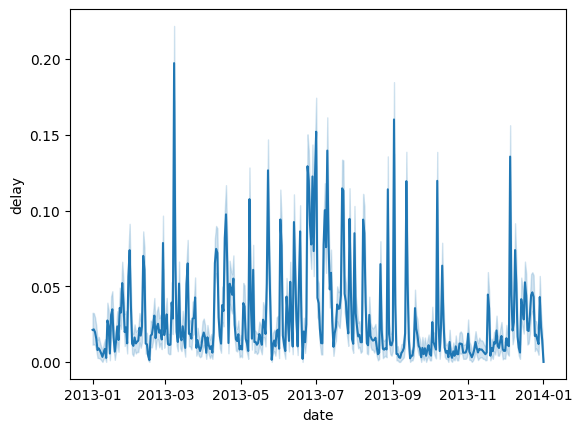

In [ ]:
sns.lineplot(data=target, x='date', y='delay')

In [ ]:
district_delay[:3]

,origin,date,delay
0,EWR,2013-01-01,0.031373
1,EWR,2013-01-02,0.042735
2,EWR,2013-01-03,0.011905


In [ ]:
weather_elements = ['temp', 'dewp', 'humid', 'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib']
weather_mean = weather.groupby(['origin', 'date'])[weather_elements].mean().reset_index()

In [ ]:
weather_mean

,origin,date,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,EWR,2013-01-01,38.702353,25.583529,59.477059,271.764706,12.523194,23.015600,0.00,1012.268750,10.000000
1,EWR,2013-01-02,28.835000,11.382500,47.786250,307.916667,12.514732,24.051302,0.00,1017.337500,10.000000
2,EWR,2013-01-03,29.457500,14.780000,54.395833,276.956522,7.863663,16.110920,0.00,1021.058333,10.000000
3,EWR,2013-01-04,33.477500,19.205000,55.880417,242.916667,13.857309,26.611787,0.00,1017.533333,10.000000
4,EWR,2013-01-05,36.732500,19.242500,49.284583,271.666667,10.836512,21.042834,0.00,1021.120833,10.000000
...,...,...,...,...,...,...,...,...,...,...,...
1087,LGA,2013-12-26,32.045000,18.440000,57.140833,203.043478,7.432121,21.289430,0.00,1026.772727,10.000000
1088,LGA,2013-12-27,35.840000,18.185000,48.848333,272.083333,12.083190,22.555288,0.00,1026.183333,10.000000
1089,LGA,2013-12-28,42.845000,22.190000,44.915833,232.500000,10.452918,22.325132,0.00,1022.854167,10.000000
1090,LGA,2013-12-29,45.035000,29.892500,58.690833,172.500000,8.726748,23.015600,0.05,1014.033333,7.677083


In [ ]:
district_weather = district_delay.merge(weather_mean, how='inner', on=['origin', 'date'])

In [ ]:
district_weather

,origin,date,delay,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,EWR,2013-01-01,0.031373,38.702353,25.583529,59.477059,271.764706,12.523194,23.015600,0.00,1012.268750,10.000000
1,EWR,2013-01-02,0.042735,28.835000,11.382500,47.786250,307.916667,12.514732,24.051302,0.00,1017.337500,10.000000
2,EWR,2013-01-03,0.011905,29.457500,14.780000,54.395833,276.956522,7.863663,16.110920,0.00,1021.058333,10.000000
3,EWR,2013-01-04,0.014706,33.477500,19.205000,55.880417,242.916667,13.857309,26.611787,0.00,1017.533333,10.000000
4,EWR,2013-01-05,0.011450,36.732500,19.242500,49.284583,271.666667,10.836512,21.042834,0.00,1021.120833,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1087,LGA,2013-12-26,0.021583,32.045000,18.440000,57.140833,203.043478,7.432121,21.289430,0.00,1026.772727,10.000000
1088,LGA,2013-12-27,0.013115,35.840000,18.185000,48.848333,272.083333,12.083190,22.555288,0.00,1026.183333,10.000000
1089,LGA,2013-12-28,0.000000,42.845000,22.190000,44.915833,232.500000,10.452918,22.325132,0.00,1022.854167,10.000000
1090,LGA,2013-12-29,0.015686,45.035000,29.892500,58.690833,172.500000,8.726748,23.015600,0.05,1014.033333,7.677083


In [ ]:

matrix = district_weather.iloc[:, 2:]
sns.pairplot(matrix)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
corr.sort_values(ascending=False)

,dep_delay
dep_delay,1.000000
humid,0.217411
dewp,0.192274
precip,0.168835
temp,0.117282
wind_speed,0.083147
wind_gust,0.081618
wind_dir,-0.030629
visib,-0.173128
pressure,-0.216102
